# 02 - Analyse Exploratoire des Données (EDA)

Ce notebook analyse en profondeur le dataset de détection de fraude avec des visualisations.

## 1. Import des librairies

In [1]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Configuration de l'affichage
pd.set_option('display.max_columns', None)

print("✓ Librairies importées avec succès")

✓ Librairies importées avec succès


## 2. Chargement des données

In [2]:
# Charger les données
df = pd.read_csv('../data/raw/fraud_synth_10000.csv')

print(f"✓ Dataset chargé : {df.shape[0]} lignes, {df.shape[1]} colonnes")
print(f"\nColonnes : {df.columns.tolist()}")

✓ Dataset chargé : 10000 lignes, 9 colonnes

Colonnes : ['transaction_amount', 'transaction_hour', 'num_transactions_24h', 'account_age_days', 'avg_amount_30d', 'country_risk', 'device_type', 'is_foreign_transaction', 'fraud']


## 3. Distribution de la variable cible

TypeError: Axes.pie() got an unexpected keyword argument 'alpha'

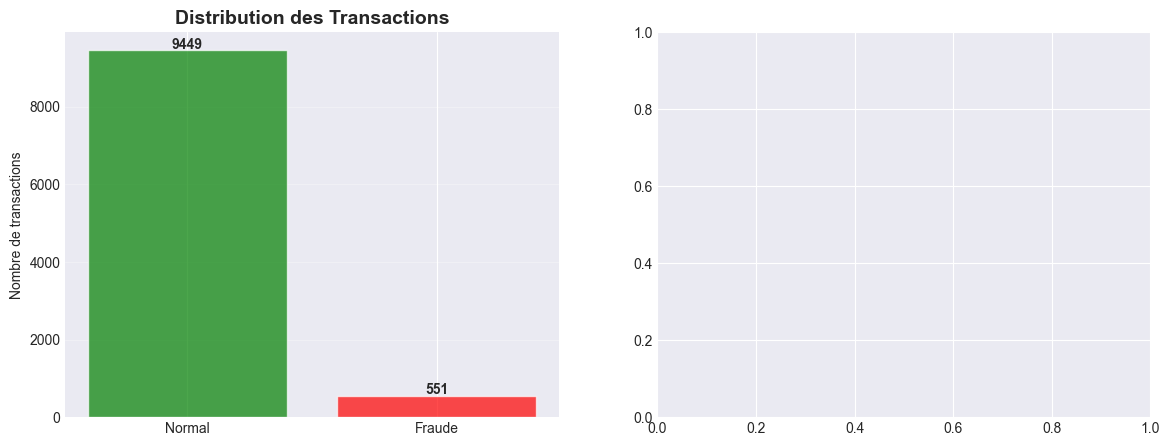

In [3]:
# Créer une figure avec 2 sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1 : Comptage
fraud_counts = df['fraud'].value_counts()
axes[0].bar(['Normal', 'Fraude'], fraud_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_title('Distribution des Transactions', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Nombre de transactions')
axes[0].grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, v in enumerate(fraud_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Graphique 2 : Pourcentage (Pie chart)
fraud_percent = df['fraud'].value_counts(normalize=True) * 100
axes[1].pie(fraud_percent, labels=['Normal', 'Fraude'], autopct='%1.1f%%', 
            colors=['green', 'red'], alpha=0.7, startangle=90)
axes[1].set_title('Répartition en Pourcentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Afficher les statistiques
print(f"\n📊 Statistiques de la variable cible :")
print(f"  Total transactions : {len(df):,}")
print(f"  Transactions normales : {fraud_counts[0]:,} ({fraud_percent[0]:.2f}%)")
print(f"  Transactions frauduleuses : {fraud_counts[1]:,} ({fraud_percent[1]:.2f}%)")
print(f"  Ratio fraude/normal : 1:{int(fraud_counts[0]/fraud_counts[1])}")

## 4. Analyse des variables numériques

In [4]:
# Sélectionner les colonnes numériques (sans la cible)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('fraud')  # Retirer la variable cible

print(f"📊 Variables numériques à analyser : {numeric_cols}")

📊 Variables numériques à analyser : ['transaction_amount', 'transaction_hour', 'num_transactions_24h', 'account_age_days', 'avg_amount_30d', 'is_foreign_transaction']


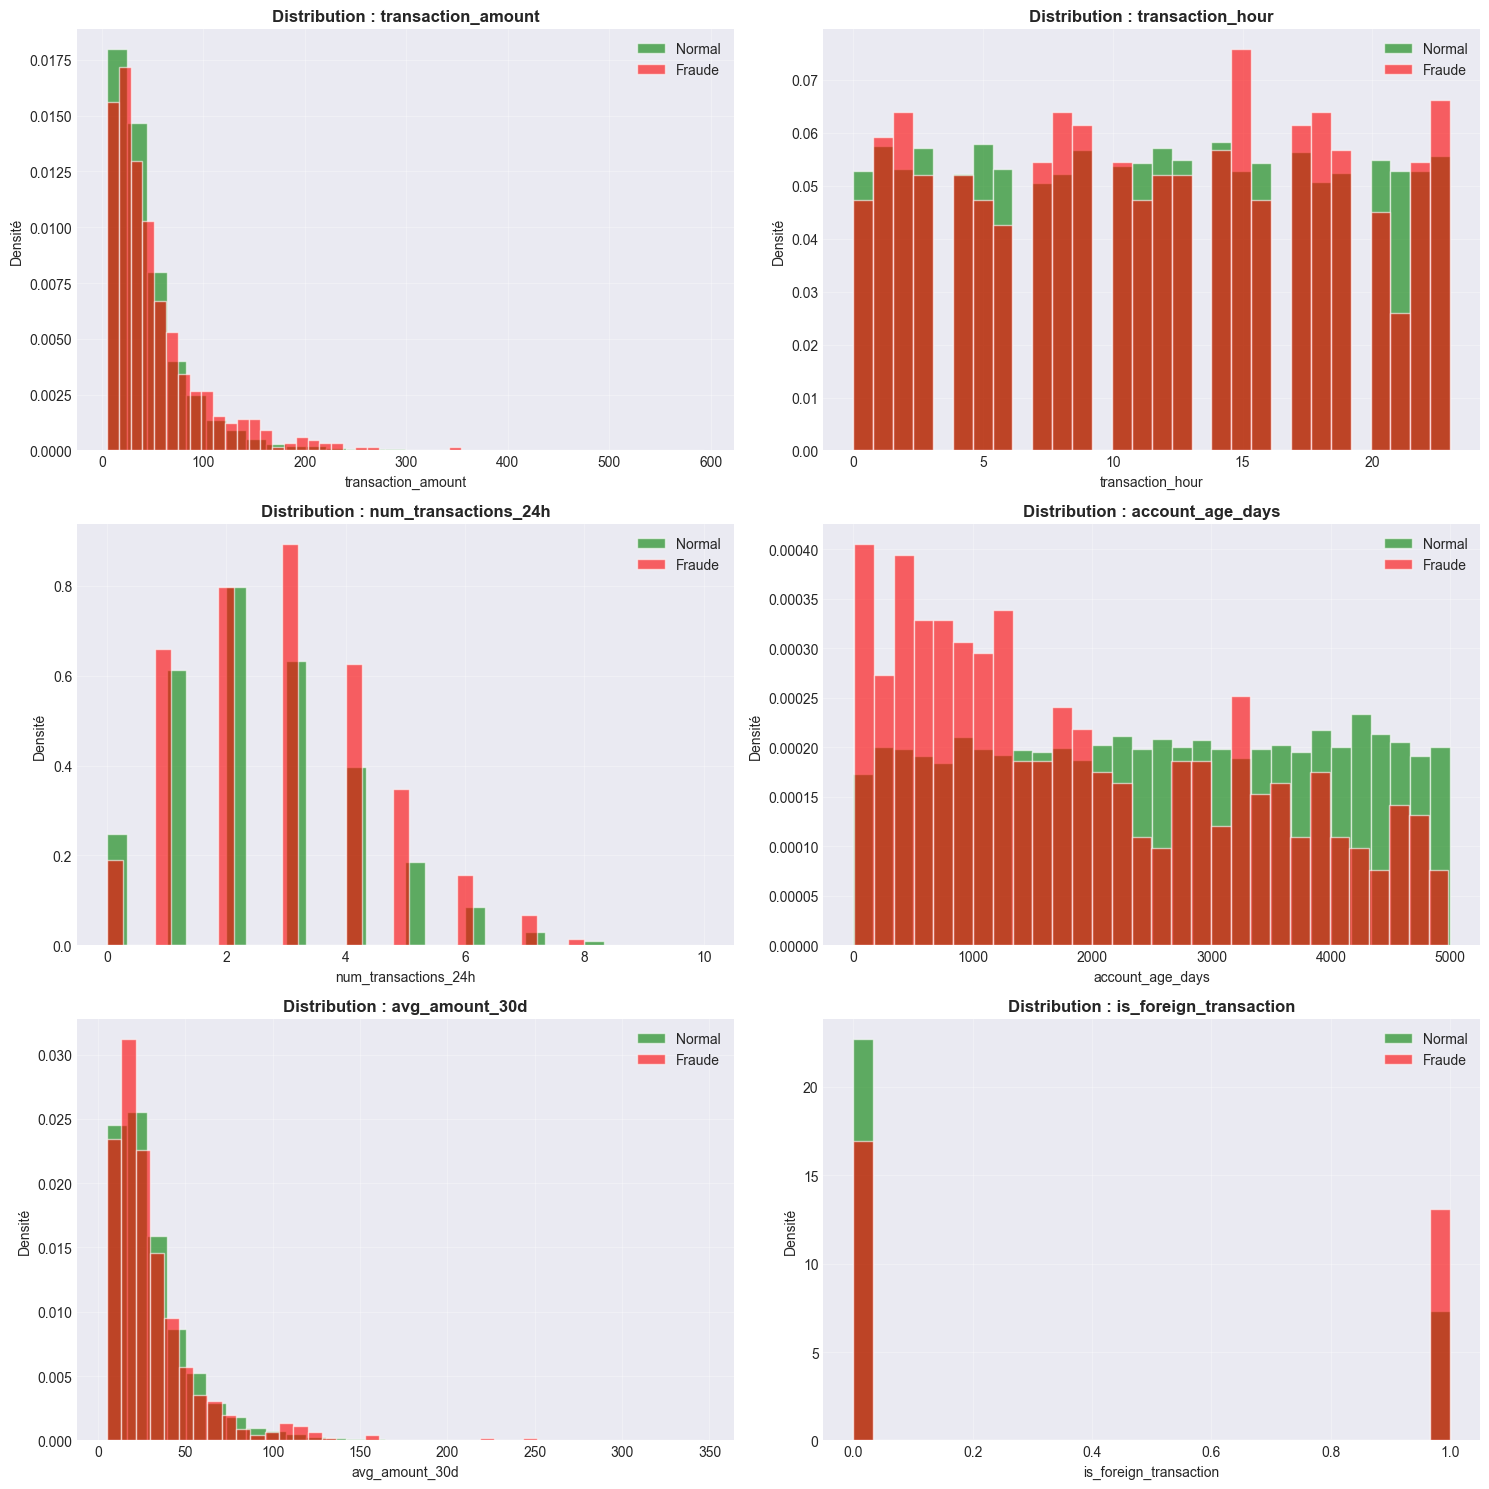

In [5]:
# Distributions des variables numériques par classe (fraud vs normal)
n_cols = len(numeric_cols)
n_rows = (n_cols + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Distribution pour les transactions normales
    axes[i].hist(df[df['fraud']==0][col], bins=30, alpha=0.6, label='Normal', color='green', density=True)
    # Distribution pour les fraudes
    axes[i].hist(df[df['fraud']==1][col], bins=30, alpha=0.6, label='Fraude', color='red', density=True)
    
    axes[i].set_title(f'Distribution : {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Densité')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

# Cacher les axes vides si nécessaire
if n_cols % 2 != 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

## 5. Boxplots - Comparaison Fraude vs Normal

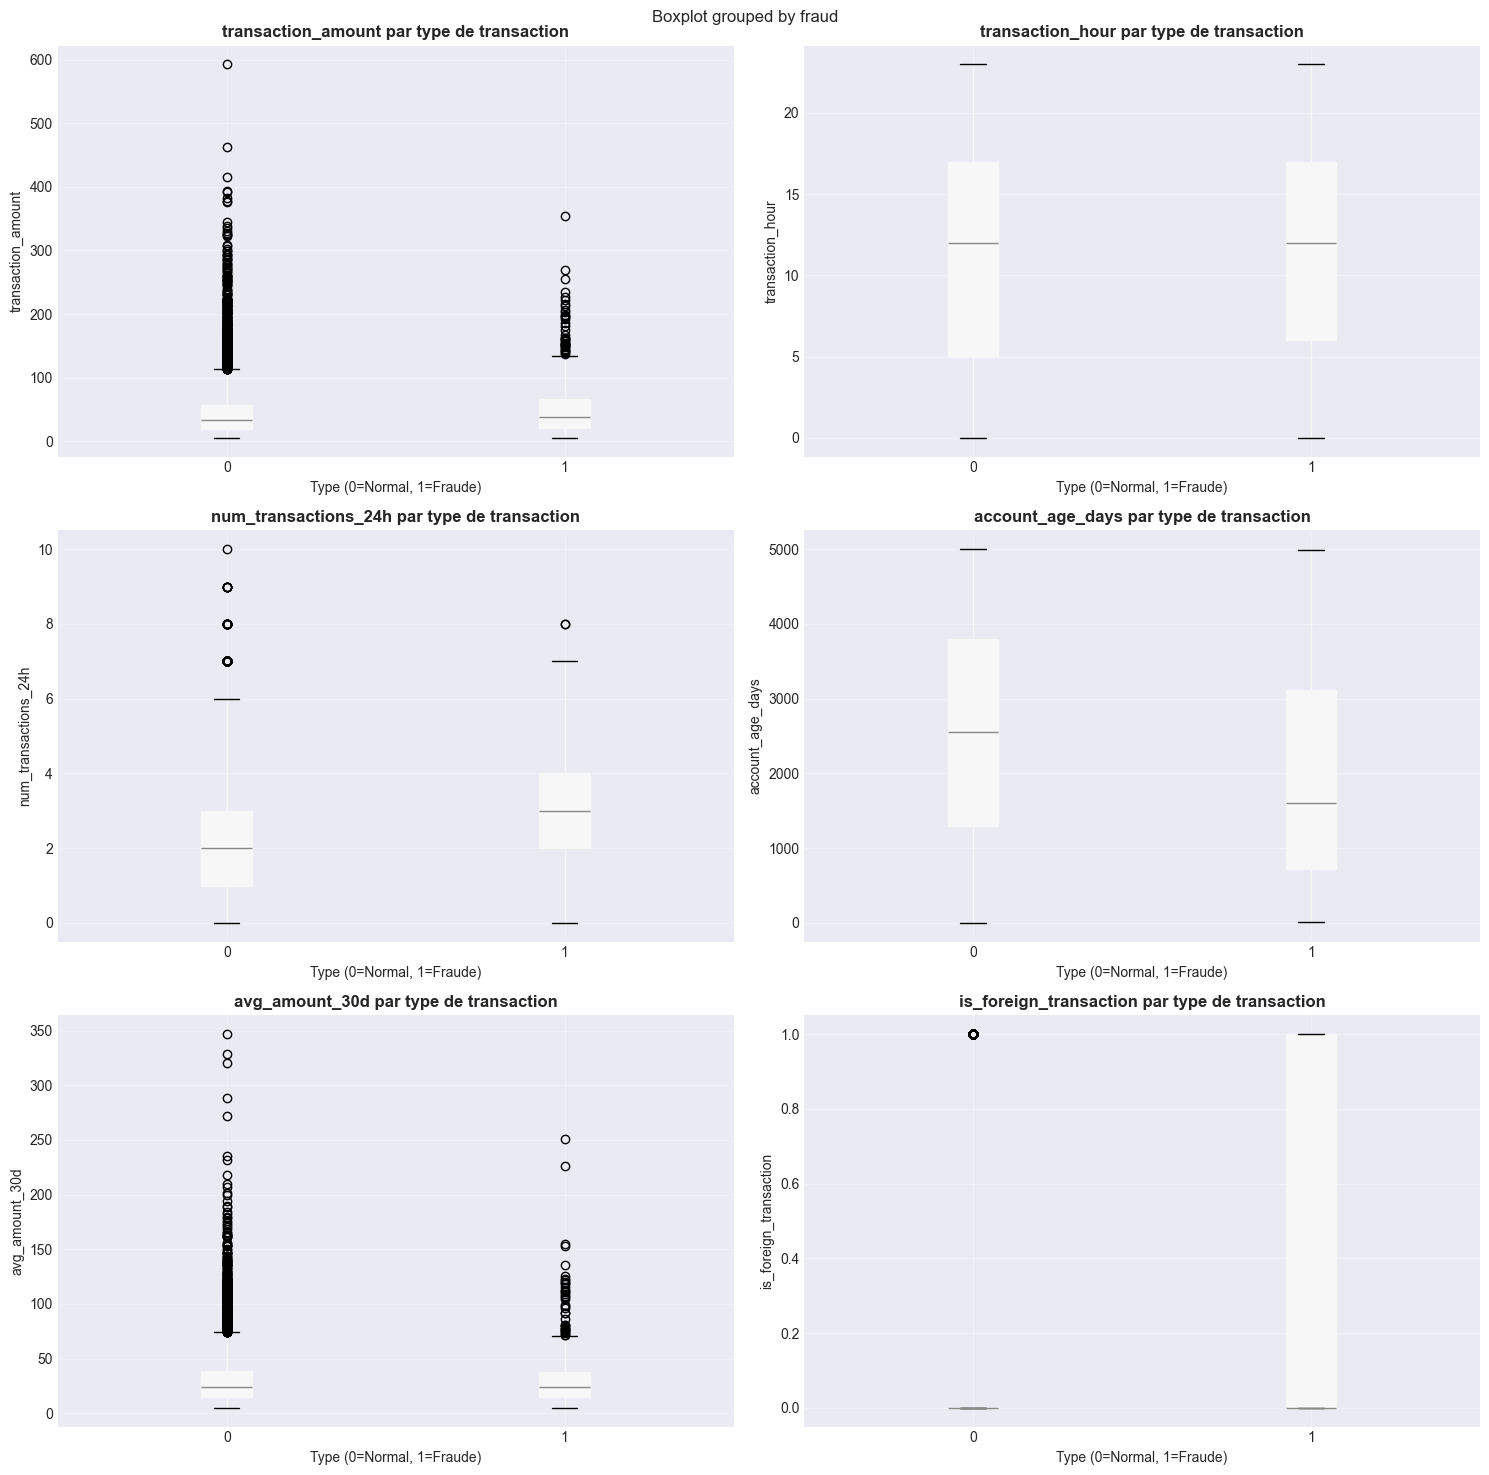

In [6]:
# Créer des boxplots pour chaque variable numérique
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Créer le boxplot
    df.boxplot(column=col, by='fraud', ax=axes[i], patch_artist=True)
    axes[i].set_title(f'{col} par type de transaction', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Type (0=Normal, 1=Fraude)')
    axes[i].set_ylabel(col)
    axes[i].grid(alpha=0.3)

# Cacher les axes vides si nécessaire
if n_cols % 2 != 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

## 6. Matrice de corrélation

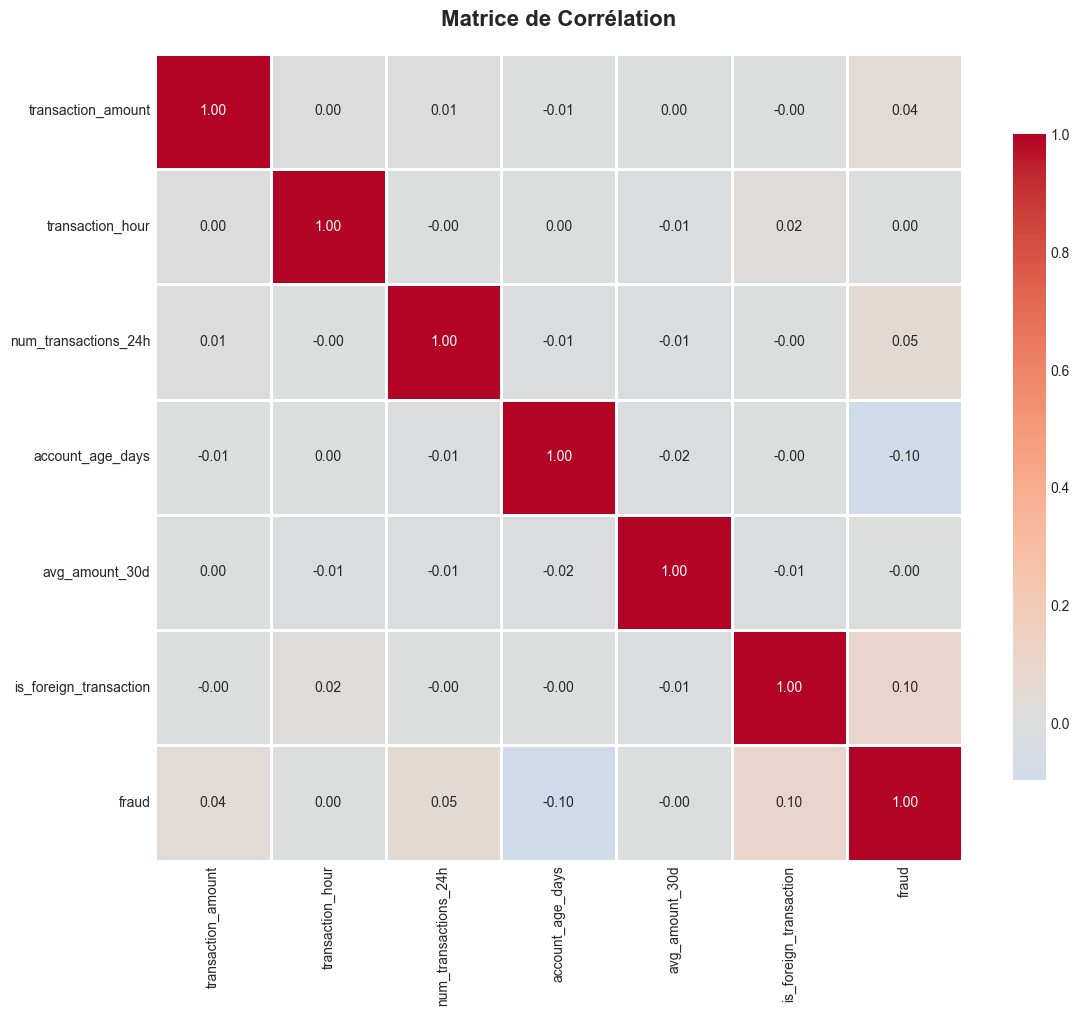


📊 Corrélations avec la variable 'fraud' :
is_foreign_transaction    0.100316
num_transactions_24h      0.054163
transaction_amount        0.038211
transaction_hour          0.000830
avg_amount_30d           -0.000483
account_age_days         -0.095771
Name: fraud, dtype: float64


In [7]:
# Calculer la matrice de corrélation
correlation_matrix = df[numeric_cols + ['fraud']].corr()

# Créer une heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Afficher les corrélations avec la variable cible
print("\n📊 Corrélations avec la variable 'fraud' :")
fraud_correlations = correlation_matrix['fraud'].drop('fraud').sort_values(ascending=False)
print(fraud_correlations)

## 7. Analyse des variables catégorielles

📝 Variables catégorielles : ['country_risk', 'device_type']


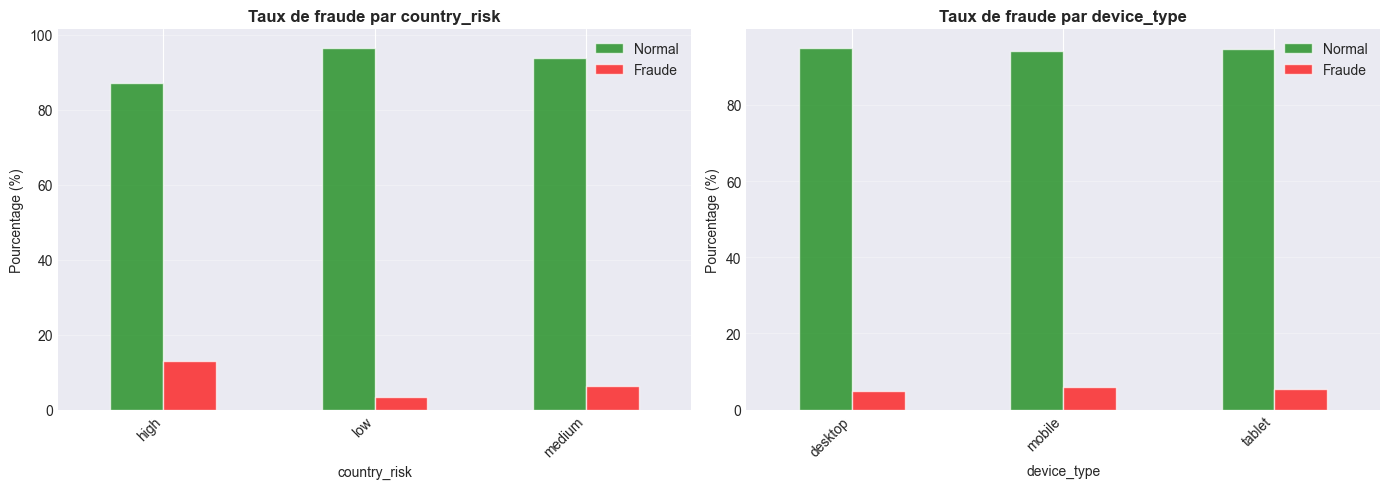

In [8]:
# Identifier les variables catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if len(categorical_cols) > 0:
    print(f"📝 Variables catégorielles : {categorical_cols}")
    
    # Créer des graphiques pour chaque variable catégorielle
    n_cat = len(categorical_cols)
    fig, axes = plt.subplots(1, n_cat, figsize=(7*n_cat, 5))
    
    if n_cat == 1:
        axes = [axes]
    
    for i, col in enumerate(categorical_cols):
        # Créer un tableau croisé
        ct = pd.crosstab(df[col], df['fraud'], normalize='index') * 100
        
        # Créer le graphique
        ct.plot(kind='bar', ax=axes[i], color=['green', 'red'], alpha=0.7)
        axes[i].set_title(f'Taux de fraude par {col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Pourcentage (%)')
        axes[i].legend(['Normal', 'Fraude'])
        axes[i].grid(axis='y', alpha=0.3)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
else:
    print("ℹ️ Aucune variable catégorielle détectée")

## 8. Statistiques descriptives par groupe

In [9]:
# Calculer les statistiques moyennes pour chaque groupe
print("📊 Statistiques moyennes - Transactions Normales vs Frauduleuses\n")

for col in numeric_cols:
    normal_mean = df[df['fraud']==0][col].mean()
    fraud_mean = df[df['fraud']==1][col].mean()
    diff_percent = ((fraud_mean - normal_mean) / normal_mean * 100)
    
    print(f"{col}:")
    print(f"  Normal  : {normal_mean:.2f}")
    print(f"  Fraude  : {fraud_mean:.2f}")
    print(f"  Diff    : {diff_percent:+.1f}%\n")

📊 Statistiques moyennes - Transactions Normales vs Frauduleuses

transaction_amount:
  Normal  : 45.23
  Fraude  : 52.14
  Diff    : +15.3%

transaction_hour:
  Normal  : 11.47
  Fraude  : 11.49
  Diff    : +0.2%

num_transactions_24h:
  Normal  : 2.48
  Fraude  : 2.85
  Diff    : +15.1%

account_age_days:
  Normal  : 2535.66
  Fraude  : 1930.58
  Diff    : -23.9%

avg_amount_30d:
  Normal  : 31.16
  Fraude  : 31.11
  Diff    : -0.2%

is_foreign_transaction:
  Normal  : 0.24
  Fraude  : 0.44
  Diff    : +78.5%



## 9. Détection des valeurs aberrantes (outliers)

In [10]:
# Utiliser la méthode IQR pour détecter les outliers
print("🔍 Détection des valeurs aberrantes (méthode IQR)\n")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Définir les limites
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Compter les outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    n_outliers = len(outliers)
    percent_outliers = (n_outliers / len(df)) * 100
    
    print(f"{col}:")
    print(f"  Outliers : {n_outliers} ({percent_outliers:.2f}%)")
    print(f"  Limites  : [{lower_bound:.2f}, {upper_bound:.2f}]\n")

🔍 Détection des valeurs aberrantes (méthode IQR)

transaction_amount:
  Outliers : 617 (6.17%)
  Limites  : [-37.48, 114.33]

transaction_hour:
  Outliers : 0 (0.00%)
  Limites  : [-13.00, 35.00]

num_transactions_24h:
  Outliers : 142 (1.42%)
  Limites  : [-2.00, 6.00]

account_age_days:
  Outliers : 0 (0.00%)
  Limites  : [-2522.38, 7542.62]

avg_amount_30d:
  Outliers : 545 (5.45%)
  Limites  : [-20.22, 74.58]

is_foreign_transaction:
  Outliers : 0 (0.00%)
  Limites  : [-1.50, 2.50]



## ✅ Conclusion de l'analyse

### Points clés identifiés :
1. **Distribution de la cible** : Vérifier si le dataset est équilibré
2. **Variables importantes** : Identifier les features les plus corrélées avec la fraude
3. **Valeurs aberrantes** : Décider si elles doivent être traitées
4. **Variables catégorielles** : Observer leur impact sur la fraude

### Prochaines étapes :
- Prétraitement des données
- Feature engineering
- Entraînement de modèles
- Évaluation des performances